### Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('dataset_phishing.csv')
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


### Explore the features

In [5]:
data.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

## Data preprocessing

#### Remove missing data

In [6]:
pd.set_option('display.max_rows', 500)
data.isna().sum()
# no nan values

url                           0
length_url                    0
length_hostname               0
ip                            0
nb_dots                       0
nb_hyphens                    0
nb_at                         0
nb_qm                         0
nb_and                        0
nb_or                         0
nb_eq                         0
nb_underscore                 0
nb_tilde                      0
nb_percent                    0
nb_slash                      0
nb_star                       0
nb_colon                      0
nb_comma                      0
nb_semicolumn                 0
nb_dollar                     0
nb_space                      0
nb_www                        0
nb_com                        0
nb_dslash                     0
http_in_path                  0
https_token                   0
ratio_digits_url              0
ratio_digits_host             0
punycode                      0
port                          0
tld_in_path                   0
tld_in_s

In [5]:
data['domain_age'].value_counts()

-1       1781
 7295     197
 3993     156
 3992     117
 5616      73
         ... 
 5076       1
 5661       1
 2466       1
 1614       1
 6728       1
Name: domain_age, Length: 4430, dtype: int64

In [18]:
data.drop(data[data['domain_age'] == -1].index, inplace=True) # remove corrupted records
data['domain_age'].head(10)

1     5767
2     4004
4     8175
6     7529
7     5767
8     7298
9     9368
11    7911
12    1505
13    1761
Name: domain_age, dtype: int64

In [19]:
data.drop(columns=['statistical_report', 'phish_hints', 
                   'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 
                   'web_traffic', 'page_rank', 'dns_record'], inplace=True)

#### Remove duplicates

In [20]:
data.drop_duplicates(inplace=True)

#### Encode status

In [21]:
class_map = {'legitimate':0, 'phishing':1}
data['status'] = data['status'].map(class_map)

In [22]:
data['status']

1        1
2        1
4        0
6        0
7        1
        ..
11424    0
11425    0
11426    1
11427    0
11428    0
Name: status, Length: 9649, dtype: int64

#### Scale data

In [24]:
# plt.hist(data['web_traffic'], bins=30) # not normally distr

### Compute correlation between features

In [31]:
corr_matrix = data.corr()
corr_matrix

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,google_index,status
length_url,1.000000,0.247257,0.456524,0.392554,0.412138,0.117290,0.510881,0.510546,NaN,0.576125,...,0.009364,-0.012145,0.033721,0.118696,-0.008561,-0.018385,-0.001434,-0.037488,0.245100,0.252385
length_hostname,0.247257,1.000000,0.294985,0.488913,0.043624,0.098420,0.190278,0.205855,NaN,0.234656,...,0.013520,-0.001854,-0.023771,0.235736,0.088238,-0.036330,-0.071503,-0.078898,0.239331,0.273672
ip,0.456524,0.294985,1.000000,0.278625,0.106295,0.020315,0.414757,0.402011,NaN,0.461975,...,0.025444,-0.015333,0.019357,0.129473,0.020680,-0.003059,-0.111747,-0.091483,0.271635,0.311066
nb_dots,0.392554,0.488913,0.278625,1.000000,0.041219,0.226347,0.329397,0.385840,NaN,0.359095,...,0.021645,0.011507,0.038627,0.107433,0.056954,0.002352,-0.021490,0.017751,0.226163,0.217193
nb_hyphens,0.412138,0.043624,0.106295,0.041219,1.000000,-0.004211,0.033565,0.119497,NaN,0.108295,...,-0.000810,0.006853,-0.032867,-0.000830,0.020196,-0.020050,0.029035,0.053994,-0.027354,-0.112830
nb_at,0.117290,0.098420,0.020315,0.226347,-0.004211,1.000000,0.212356,0.027775,NaN,0.094207,...,-0.004112,-0.004943,-0.013601,0.056687,-0.017061,-0.021813,-0.016758,-0.066981,0.107828,0.136562
nb_qm,0.510881,0.190278,0.414757,0.329397,0.033565,0.212356,1.000000,0.528325,NaN,0.743504,...,0.043729,-0.014543,0.019382,0.085781,-0.045771,-0.013820,-0.028357,-0.075338,0.213564,0.303488
nb_and,0.510546,0.205855,0.402011,0.385840,0.119497,0.027775,0.528325,1.000000,NaN,0.899839,...,0.003015,-0.007603,-0.023934,0.068600,0.019638,-0.013692,-0.044391,-0.037350,0.147504,0.181243
nb_or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nb_eq,0.576125,0.234656,0.461975,0.359095,0.108295,0.094207,0.743504,0.899839,NaN,1.000000,...,0.012455,-0.008385,-0.015116,0.085407,0.003893,-0.018603,-0.044726,-0.047826,0.187890,0.249192


##### Correlation to the target

In [32]:
corr_target_matrix = corr_matrix['status']
corr_target_matrix.dropna(inplace=True)
corr_target_matrix.drop(index='status', inplace=True)
corr_target_matrix = corr_target_matrix.abs()
corr_target_matrix

length_url                    0.252385
length_hostname               0.273672
ip                            0.311066
nb_dots                       0.217193
nb_hyphens                    0.112830
nb_at                         0.136562
nb_qm                         0.303488
nb_and                        0.181243
nb_eq                         0.249192
nb_underscore                 0.030879
nb_tilde                      0.029714
nb_percent                    0.024294
nb_slash                      0.228929
nb_star                       0.029230
nb_colon                      0.093305
nb_comma                      0.014505
nb_semicolumn                 0.090737
nb_dollar                     0.025561
nb_space                      0.006744
nb_www                        0.435389
nb_com                        0.165636
nb_dslash                     0.066199
http_in_path                  0.057524
https_token                   0.092255
ratio_digits_url              0.352119
ratio_digits_host        

In [14]:
corr_target_matrix.describe()

count    72.000000
mean      0.147204
std       0.128184
min       0.000210
25%       0.038125
50%       0.138511
75%       0.209808
max       0.728185
Name: status, dtype: float64

#### Pick right features

In [15]:
data.info()
# all numeric (excl url)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 1 to 11428
Data columns (total 81 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         9649 non-null   object 
 1   length_url                  9649 non-null   int64  
 2   length_hostname             9649 non-null   int64  
 3   ip                          9649 non-null   int64  
 4   nb_dots                     9649 non-null   int64  
 5   nb_hyphens                  9649 non-null   int64  
 6   nb_at                       9649 non-null   int64  
 7   nb_qm                       9649 non-null   int64  
 8   nb_and                      9649 non-null   int64  
 9   nb_or                       9649 non-null   int64  
 10  nb_eq                       9649 non-null   int64  
 11  nb_underscore               9649 non-null   int64  
 12  nb_tilde                    9649 non-null   int64  
 13  nb_percent                  9649

In [25]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

##### Define X and y

In [26]:
data = data.drop(columns='url').astype(float)

X = data.drop(columns=['status'])
y = data['status']

##### Split data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42, stratify=y)

##### Pick right threshold

In [50]:
model = RandomForestClassifier(n_estimators=10, random_state=1) # best result - 0.961

accuracies = []
thresholds = [0.05, 0.1, 0.15, 0.2, 
              0.25, 0.3, 0.35, 0.4, 
              0.45, 0.5, 0.55, 0.6, 
              0.65, 0.7]

for threshold in thresholds:
    selected_features = corr_target_matrix[corr_target_matrix > threshold].index
        
    if len(selected_features) == 0:
        break
    
    X_new_test = X_test[selected_features]
    X_new_train = X_train[selected_features]
    
    model.fit(X_new_train, y_train)
    
    # accuracy = model.score(X_new_test, y_test)
    
    accuracy = np.mean(cross_val_score(model, X_new_test[selected_features], y_test , cv=5))
    
    accuracies.append(accuracy)
    
    print(f'Threshold: {threshold}, Accuracy: {accuracy}')

Threshold: 0.05, Accuracy: 0.9431257391036892
Threshold: 0.1, Accuracy: 0.9438161878954039
Threshold: 0.15, Accuracy: 0.9385230123082307
Threshold: 0.2, Accuracy: 0.9424336994161411
Threshold: 0.25, Accuracy: 0.9309209165681196
Threshold: 0.3, Accuracy: 0.9200980522132014
Threshold: 0.35, Accuracy: 0.8998350771319329
Threshold: 0.4, Accuracy: 0.8970724865171578
Threshold: 0.45, Accuracy: 0.86345685755649
Threshold: 0.5, Accuracy: 0.86345685755649
Threshold: 0.55, Accuracy: 0.86345685755649
Threshold: 0.6, Accuracy: 0.86345685755649
Threshold: 0.65, Accuracy: 0.86345685755649
Threshold: 0.7, Accuracy: 0.86345685755649


Text(0, 0.5, 'Accuracy')

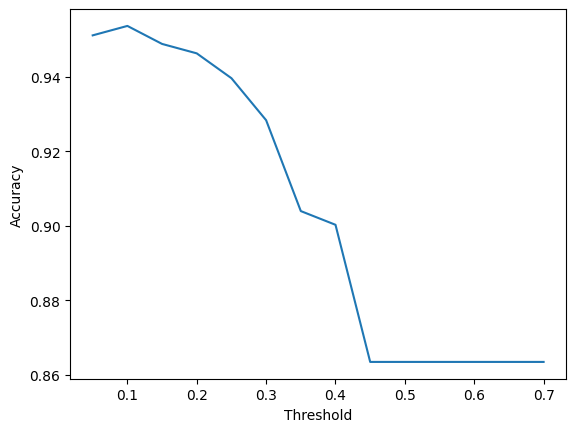

In [45]:
plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

In [46]:
# Best threshold
selected_features = corr_target_matrix[corr_target_matrix > 0.1].index
print(len(selected_features))
selected_features

40


Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_eq', 'nb_slash', 'nb_www', 'nb_com',
       'ratio_digits_url', 'ratio_digits_host', 'tld_in_subdomain',
       'nb_subdomains', 'prefix_suffix', 'shortening_service',
       'length_words_raw', 'shortest_word_host', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'nb_hyperlinks',
       'ratio_intHyperlinks', 'ratio_extRedirection', 'external_favicon',
       'links_in_tags', 'ratio_intMedia', 'ratio_extMedia', 'safe_anchor',
       'empty_title', 'domain_in_title', 'domain_with_copyright',
       'domain_registration_length', 'domain_age', 'google_index'],
      dtype='object')

In [47]:
# Best model
X_new_test = X_test[selected_features]
X_new_train = X_train[selected_features]
    
model.fit(X_new_train, y_train)

RandomForestClassifier(random_state=1)

### Evaluating performance using different metrics

#### Recall (most important)

In [56]:
from sklearn.metrics import recall_score

y_pred = model.predict(X_new_test)

recall_score(y_test, y_pred)

0.9

#### Precision

In [51]:
from sklearn.metrics import precision_score
    
y_pred = model.predict(X_new_test)

precision_score(y_test, y_pred)

0.8355748373101952

#### Accuracy

In [54]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_test, y_test, cv=5).mean()

0.9405914420410133

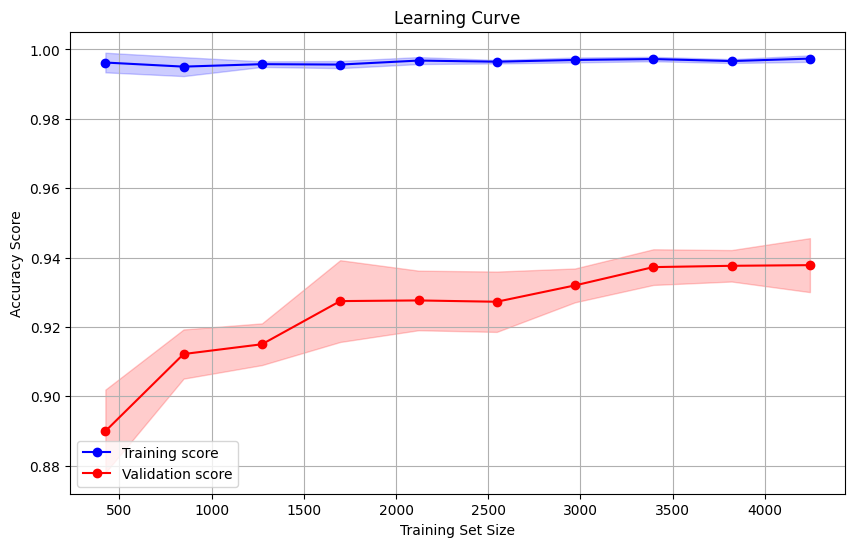

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, train_sizes, cv, scoring):
    """
    Plots learning curves for a given estimator.

    Parameters:
    - estimator: Your machine learning model
    - X: Feature matrix
    - y: Target variable
    - train_sizes: Array of training set sizes
    - cv: Number of cross-validation folds
    - scoring: Scoring metric (e.g., accuracy, precision, recall)

    Returns:
    - Plots the learning curves
    """

    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring=scoring, shuffle=True, random_state=1
    )

    # Calculate mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot the learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue", marker="o")
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.2,
        color="blue",
    )
    plt.plot(train_sizes, validation_scores_mean, label="Validation score", color="red", marker="o")
    plt.fill_between(
        train_sizes,
        validation_scores_mean - validation_scores_std,
        validation_scores_mean + validation_scores_std,
        alpha=0.2,
        color="red",
    )

    # Add labels and title
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel(scoring.capitalize() + " Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Assuming you have your features X and target variable y
# Adjust train_sizes, cv, and scoring as needed
train_sizes = np.linspace(0.1, 1.0, 10)  # 10 evenly spaced values between 10% and 100%
cv = 5  # Number of cross-validation folds
scoring = "accuracy"  # Choose an appropriate scoring metric

# Plot the learning curve
plot_learning_curve(model, X_train, y_train, train_sizes, 5, 'accuracy')

### Save pre-trained model

In [22]:
import pickle

with open('model_phishing_url_classifer','wb') as file:
    pickle.dump(model,file)

## Next steps:

### - Model tuning: Grid search on RandomForestClassifier
### - Check for overfitting